In [1]:
import glob
from functools import reduce

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [12]:
# read in the data
plot_data_list = []

for i in glob.glob("../results/*.csv"):
    plot_data_list.append(pd.read_csv(i, header=0, na_filter=False))

In [13]:
plot_data = pd.DataFrame()

for i in ['Rate', 'Request rate', 'Number of requests',
          'Response status 1xx', 'Response status 2xx', 'Response status 3xx', 
          'Response status 4xx', 'Response status 5xx']:
    plot_data[i] = reduce(lambda x, y: x + y, [plot_data_list[j][i] for j in range(len(plot_data_list))])

plot_data['Response time'] = reduce(lambda x, y: x + y, [plot_data_list[j]['Response time'] 
                                                         for j in range(len(plot_data_list))]) / len(plot_data_list)

plot_data.head()

,Rate,Request rate,Number of requests,Response status 1xx,Response status 2xx,Response status 3xx,Response status 4xx,Response status 5xx,Response time
0,400,400.0,16000,0,16000,0,0,0,0.5125
1,560,560.0,16000,0,16000,0,0,0,0.4875
2,720,720.0,16000,0,16000,0,0,0,0.5125
3,880,880.1,16000,0,16000,0,0,0,0.4500
4,1040,1040.7,16000,0,16000,0,0,0,0.7500


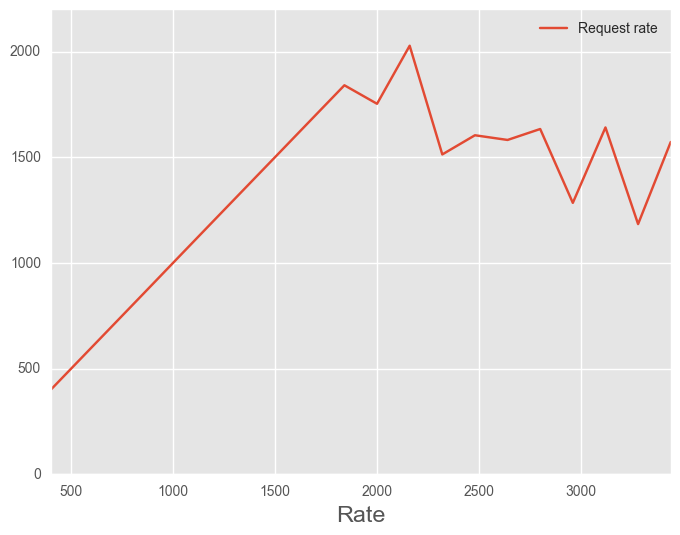

In [14]:
plot_data.plot('Rate', 'Request rate', ylim=(0, None))

In [6]:
plot_data['Request rate'].describe()

count      20.000000
mean     1770.850000
std       771.796601
min       400.000000
25%      1160.725000
50%      1920.800000
75%      2439.500000
max      2772.000000
Name: Request rate, dtype: float64

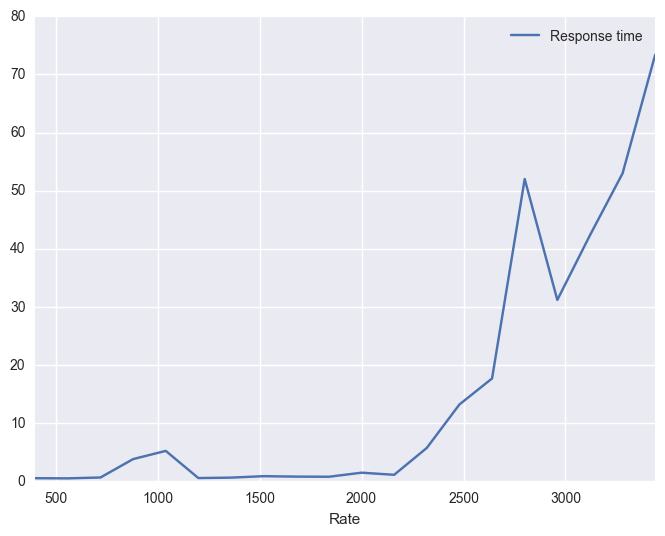

In [7]:
plot_data.plot('Rate', 'Response time', ylim=(0, None))

In [8]:
plot_data['Response time'].describe()

count    20.000000
mean     15.285625
std      22.438949
min       0.512500
25%       0.756250
50%       2.656250
75%      21.078125
max      73.412500
Name: Response time, dtype: float64

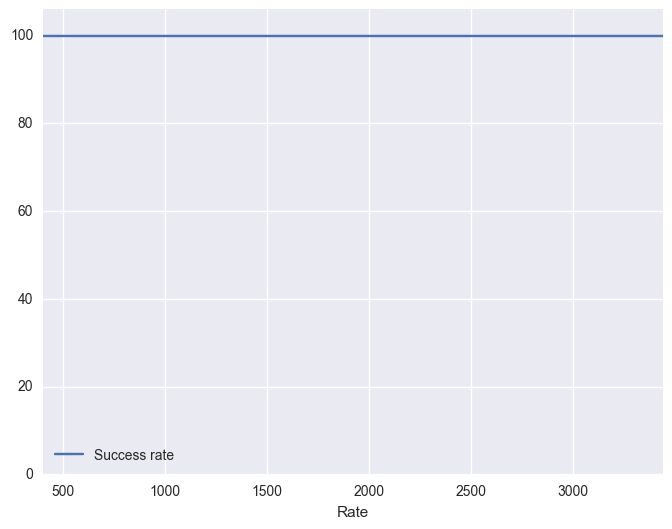

In [9]:
plot_data['Success rate'] = (plot_data['Response status 2xx'] + plot_data['Response status 3xx']) / plot_data['Number of requests'] * 100.0
plot_data.plot('Rate', 'Success rate', ylim=(0, None))

In [10]:
plot_data['Success rate'].describe()

count     20.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: Success rate, dtype: float64